In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Import a catalog of choice into an object.

In [2]:
import flathub.client
gaea = flathub.client.Catalog('gaea')

Print the field names that you can use to query the database.

In [3]:
gaea.fields.keys()

dict_keys(['MMSubID', 'Pos_y', 'Vel_y', 'z', 'GasDiskRadius', 'Type', 'GalID', 'Vvir', 'ColdGas', 'Vel_z', 'CentralMvir', 'GasSpin_z', 'PPos_x', 'Vmax', 'z_pos', 'Rvir', 'GasSpin_x', 'PPos_y', 'Vel_x', 'StellarDiskRadius', 'GasSpin_y', 'StellarMass', 'Pos_z', 'Mvir', 'Pos_x', 'HI'])

An example query using a sample of query methods.

In [4]:
q = gaea.query(fields = ['Pos_x', 'Pos_y', 'z', 'Mvir'], z = (0.1, 0.4), seed = 0)
q.count()

122448740

Print the basic aggregated statistics of a field in the catalog.

In [5]:
q.aggs('Pos_x')

{'avg': 1.5416174360528716,
 'count': 122448740,
 'max': 1099.12890625,
 'min': -1092.10791015625,
 'sum': 188769112.6067047}

Update and refine your query after declaration.

In [6]:
q.update(sample = 0.5, ColdGas = (0.3, 0.4))
q.count()

4876203

Retrieve histogram data for a specific field and plot it.

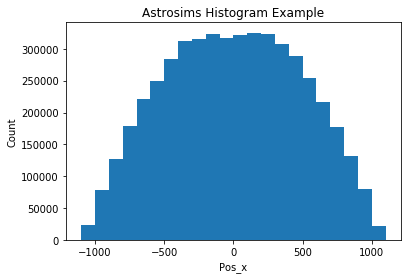

In [9]:
h = q.hist('Pos_x')

plt.bar(x=[i[0] for i in h], height=[i[1] for i in h], width = h[1][0] - h[0][0], align = 'edge')
plt.xlabel('Pos_x')
plt.ylabel('Count')
plt.title('Astrosims Histogram Example')
plt.show()

Download your data as a numpy array.

In [10]:
q.update(sample = 0.1, StellarMass = (0.3,0.4), GasDiskRadius = (0.0075, 0.0085), HI = (0.18, 0.20), StellarDiskRadius = (0.0075, 0.008))
q.count()
data = q.numpy()

Plotting options are now in the hands of other Python libraries.

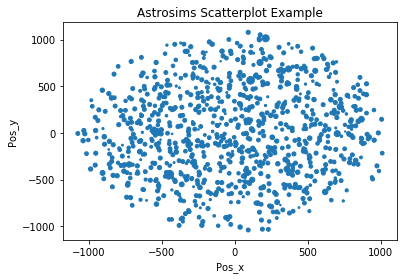

In [11]:
x = data['Pos_x']
y = data['Pos_y']

# Plot scatterplot 
plt.scatter(x, y, s = data['Mvir'])
plt.title('Astrosims Scatterplot Example')
plt.xlabel('Pos_x')
plt.ylabel('Pos_y')
plt.show()

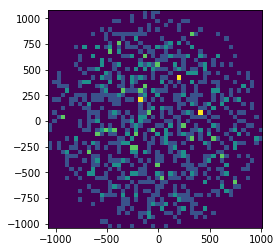

In [12]:
# Create heatmap data
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
# Plot heatmap
plt.imshow(heatmap, extent=extent)
plt.show()

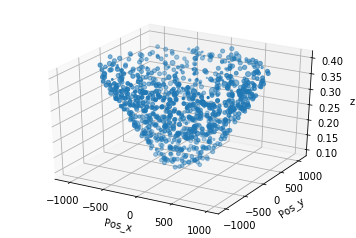

In [13]:
z = data['z']

# plot 3D scatterplot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xs=x, ys=y, zs=z, s = data['Mvir'])
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('z')
plt.show()